### Solving Differential Equation using Adams Bashforth Predictor Corrector method

**Here the target is to solve the following - 
${dy \over dx} = y - x^2 + 1 , y_0= 0.5$ <br /> 
<br /> The exact solution is - $y(x) = (x+1)^2 - e^x/2$**

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Differential Equation and Exact solution

In [2]:
def diff_fn(x, y):
    
    return y - x**2 +1

def exact_sol(x):
   
    return (x+1.0)**2 - np.exp(x)/2

### Plotting True Function 

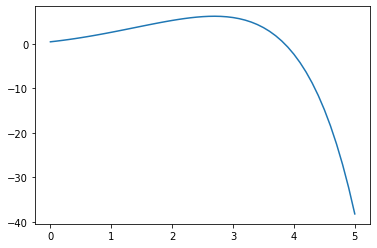

In [3]:
x = np.linspace(0, 5, 51)
y_true = [exact_sol(i) for i in x]
plt.plot(x, y_true)
legend = ['True']
plt.show()

### Adams Bashforth Predictor Corrector method

In [4]:
def AB_Predictor_Corrector(f, a, b, y0, step_size = 0.1):
        
    h = step_size #(b-a)/n_steps 
    n_steps = int((b-a)/step_size)
    
    x = np.linspace(a, b, n_steps + 1, endpoint= True) 
    y = np.zeros((n_steps + 1,)) 
    
    y[0] = y0  

    #using RK4 to obtain the first 3 points
    for i in range(0, n_steps):
        
        if i in range(0,3):
            k1 = h * f(x[i],y[i])
            k2 = h * f(x[i] + (h/2.0), y[i] +(k1/2.0))
            k3 = h * f(x[i] + (h/2.0), y[i] + (k2/2.0))
            k4 = h * f(x[i] + h, y[i] + k3)
        
            y[i + 1] = y[i] + (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
            
        else:
            
             y[i + 1] = y[i] + h*(55.0 * f(x[i],y[i]) - 59.0 * f(x[i-1],y[i-1]) + 37.0 * f(x[i-2],y[i-2]) - 9.0 * f(x[i-3],y[i-3]))/24.0
             
             y[i + 1] = y[i] + h*(9.0 * f(x[i+1], y[i + 1]) + 19.0 * f(x[i],y[i]) - 5.0 * f(x[i-1],y[i-1]) + f(x[i-2],y[i-2]))/24.0
             
             
    return y

### Approximation

Errors:
 [0.00000000e+00 1.65962176e-07 3.44922519e-07 5.37779393e-07
 6.90095461e-07 8.67093029e-07 1.07423807e-06 1.31528731e-06
 1.59514960e-06 1.91933151e-06 2.29405863e-06 2.72637696e-06
 3.22425555e-06 3.79670262e-06 4.45389606e-06 5.20732978e-06
 6.06997796e-06 7.05647933e-06 8.18334371e-06 9.46918369e-06
 1.09349743e-05 1.26043443e-05 1.45039017e-05 1.66635999e-05
 1.91171466e-05 2.19024622e-05 2.50621929e-05 2.86442859e-05
 3.27026322e-05 3.72977863e-05 4.24977725e-05 4.83789856e-05
 5.50271996e-05 6.25386951e-05 7.10215210e-05 8.05969048e-05
 9.14008291e-05 1.03585795e-04 1.17322792e-04 1.32803500e-04
 1.50242751e-04 1.69881277e-04 1.91988784e-04 2.16867382e-04
 2.44855417e-04 2.76331755e-04 3.11720557e-04 3.51496622e-04
 3.96191341e-04 4.46399355e-04 5.02785974e-04]

Plot - True vs Approximation - 



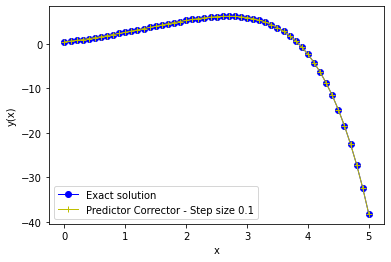

In [5]:
step_size = 0.1
a = 0.0 
b = 5.0 
y0 = 0.5 

n_steps = int((b-a)/step_size)
x = np.linspace(a, b, n_steps + 1, endpoint= True)

y = AB_Predictor_Corrector(diff_fn, a, b, y0, step_size)
y_true = exact_sol(x) 

### Errors
print('Errors:\n',np.abs(np.transpose(np.ravel(y)-y_true)))

### Compare true and approximate solution
print('\nPlot - True vs Approximation - \n')
plt.figure()
plt.plot(x, y_true, 'b-', marker='o', linewidth=1) # True solution
plt.plot(x, y, 'y-', marker='+', linewidth=1)  # Approximation 

plt.xlabel('x')	# set x-axis label as x
plt.ylabel('y(x)')	# set y-axis label as y(x)
plt.legend(['Exact solution', 'Predictor Corrector - Step size 0.1'])

plt.show()